In [1]:
from generate_test_beam import generate_test_beam, generate_test_images

tensor([-5.], device='cuda:0') tensor(64.9597, device='cuda:0', dtype=torch.float64)
tensor([-2.6316], device='cuda:0') tensor(61.1094, device='cuda:0', dtype=torch.float64)
tensor([-0.2632], device='cuda:0') tensor(63.6500, device='cuda:0', dtype=torch.float64)
tensor([2.1053], device='cuda:0') tensor(72.4202, device='cuda:0', dtype=torch.float64)
tensor([4.4737], device='cuda:0') tensor(87.2633, device='cuda:0', dtype=torch.float64)
tensor([6.8421], device='cuda:0') tensor(108.0266, device='cuda:0', dtype=torch.float64)
tensor([9.2105], device='cuda:0') tensor(134.5621, device='cuda:0', dtype=torch.float64)


/home/jp/miniforge3/envs/phase_space_reconstruction/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755897462/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


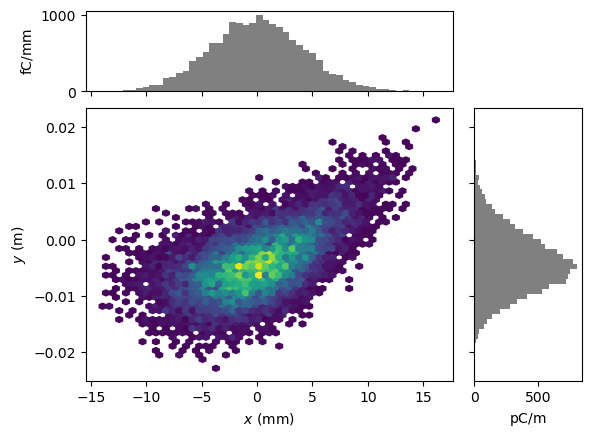

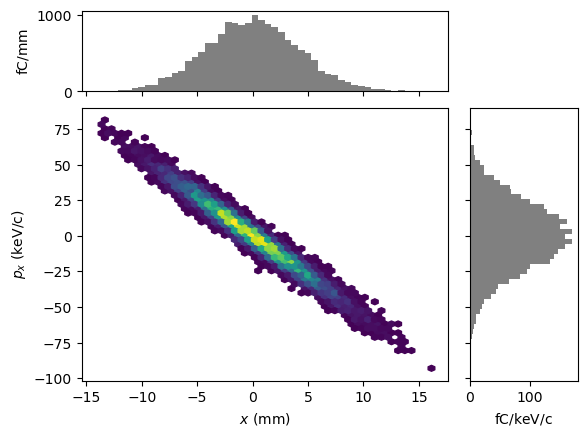

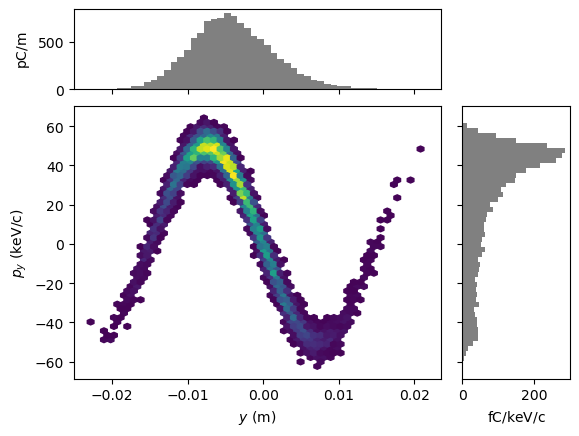

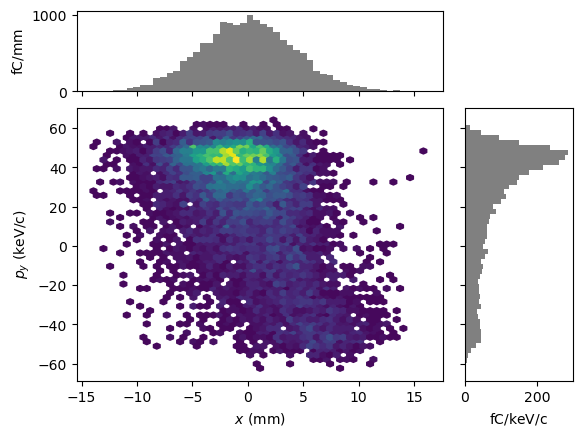

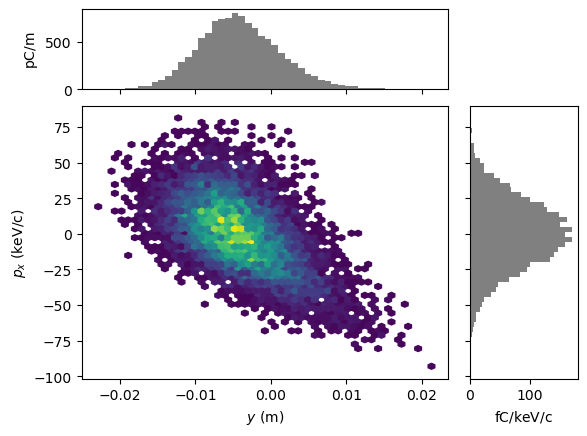

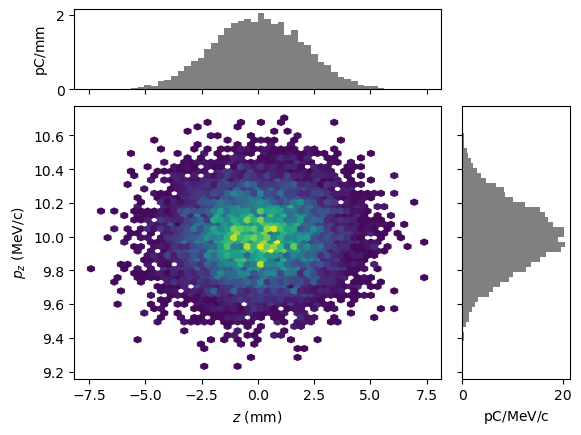

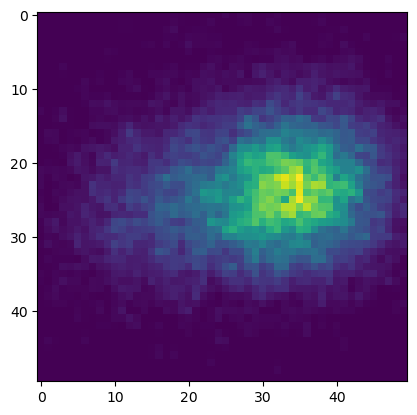

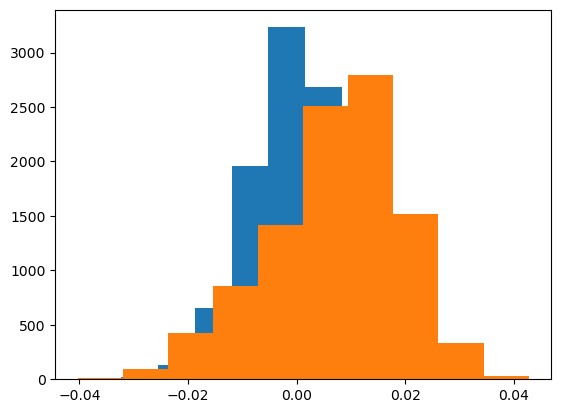

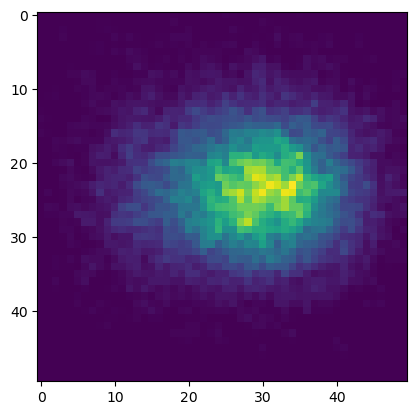

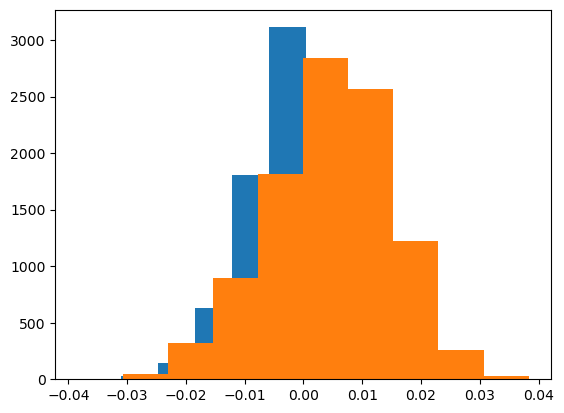

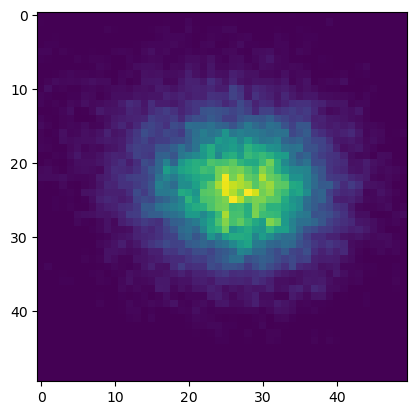

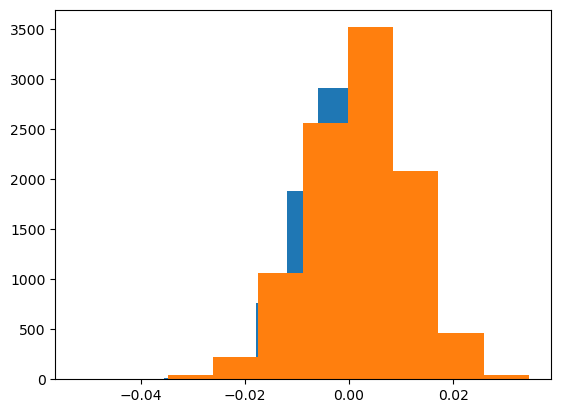

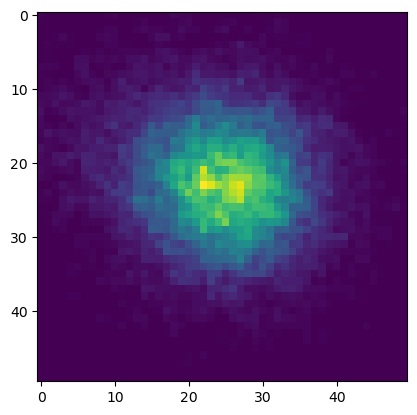

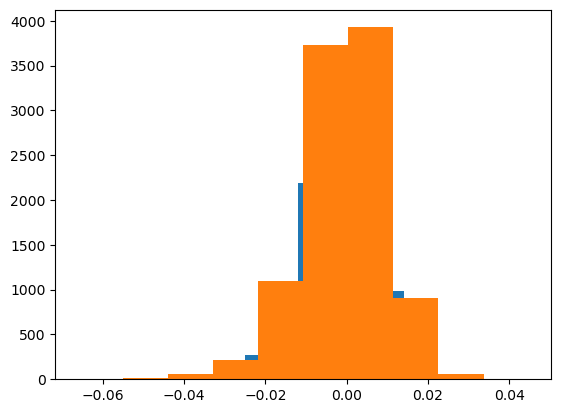

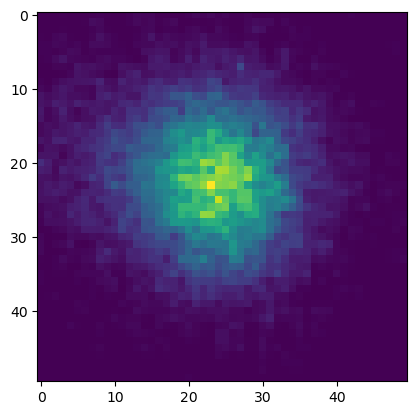

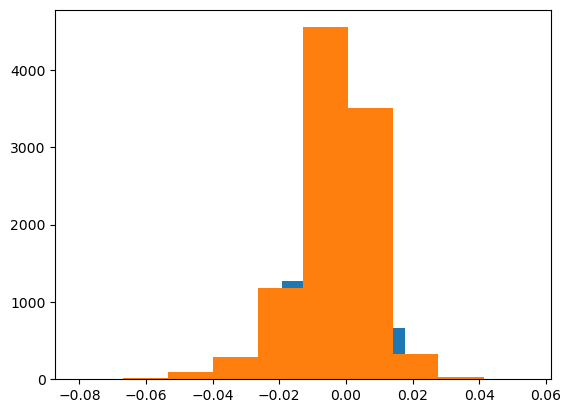

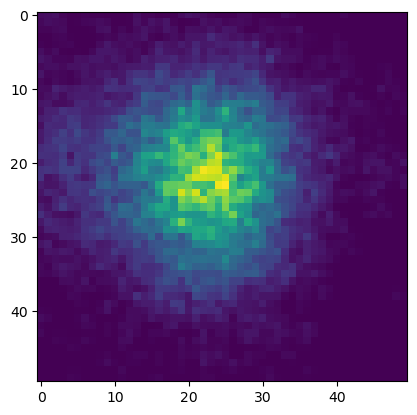

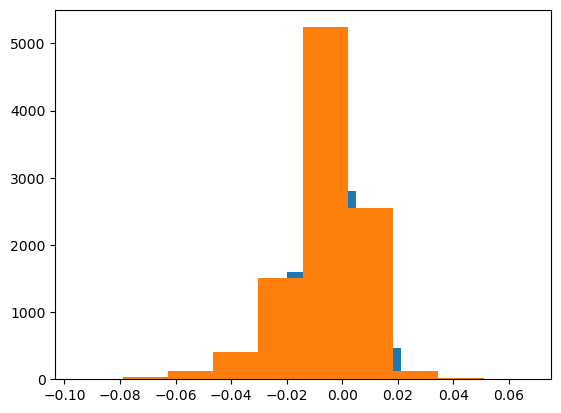

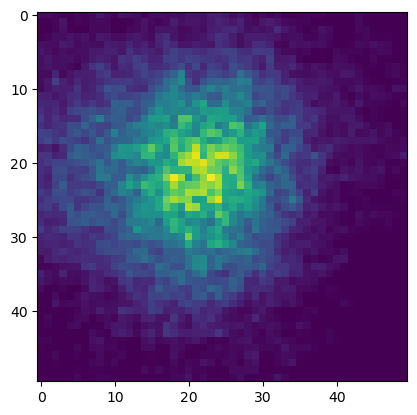

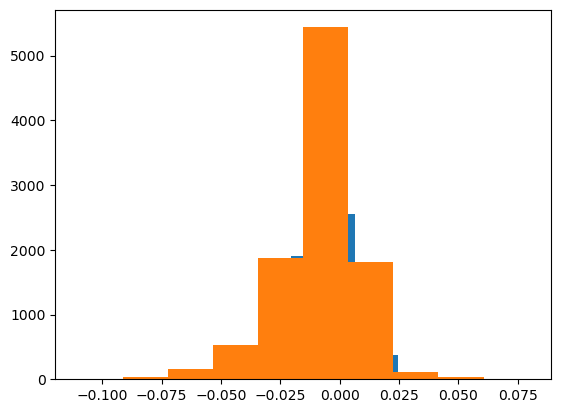

In [2]:
generate_test_images()

In [3]:
import torch
beam_coords = torch.load("ground_truth_dist.pt")
cov = torch.cov(beam_coords.T)

In [4]:
ycov = cov[2:4,2:4]
emit = torch.det(ycov).sqrt()
twiss = ycov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 1.1634262422065009e-05
beta 2.5700474185176123
alpha 0.9853868365247753
gamma 0.7669069463057447


In [5]:
xcov = cov[:2,:2]
emit = torch.det(xcov).sqrt()
twiss = xcov / emit
print(f"emit {emit}")
print(f"beta {twiss[0,0]}")
print(f"alpha {-twiss[1,0]}")
print(f"gamma {twiss[1,1]}")

emit 2.008131088522362e-06
beta 8.964454702638074
alpha 4.97941713295565
gamma 2.8774304561304094


In [6]:
beam_coords.shape

torch.Size([10000, 6])

In [7]:
bins = torch.load("bins.pt")

In [8]:
bins[1]-bins[0]

tensor(0.0012)

(array([  10.,   82.,  414., 1343., 2524., 2794., 1850.,  773.,  183.,
          27.]),
 array([-0.07689777, -0.06216887, -0.04743996, -0.03271106, -0.01798216,
        -0.00325326,  0.01147564,  0.02620454,  0.04093344,  0.05566234,
         0.07039125]),
 <BarContainer object of 10 artists>)

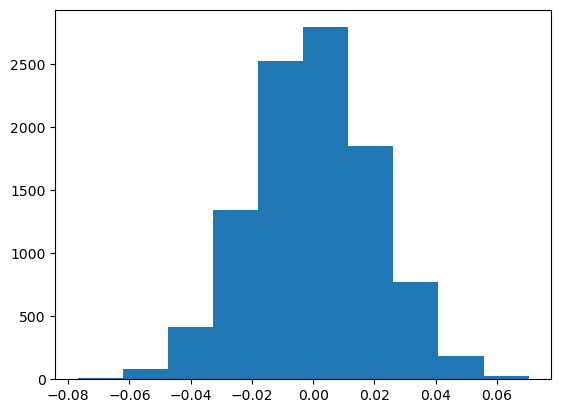

In [9]:
import matplotlib.pyplot as plt
plt.hist(beam_coords.T[-1].numpy())

In [10]:
from dev.minimal_example.fitting_2 import train_single_model

0 tensor(67665136., device='cuda:0', grad_fn=<MulBackward0>)
100 tensor(8822456., device='cuda:0', grad_fn=<MulBackward0>)
200 tensor(9005266., device='cuda:0', grad_fn=<MulBackward0>)
300 tensor(8343472., device='cuda:0', grad_fn=<MulBackward0>)
400 tensor(8275329., device='cuda:0', grad_fn=<MulBackward0>)
500 tensor(8118521.5000, device='cuda:0', grad_fn=<MulBackward0>)
600 tensor(8008989., device='cuda:0', grad_fn=<MulBackward0>)
700 tensor(8463025., device='cuda:0', grad_fn=<MulBackward0>)
800 tensor(7785856., device='cuda:0', grad_fn=<MulBackward0>)
900 tensor(7764434., device='cuda:0', grad_fn=<MulBackward0>)


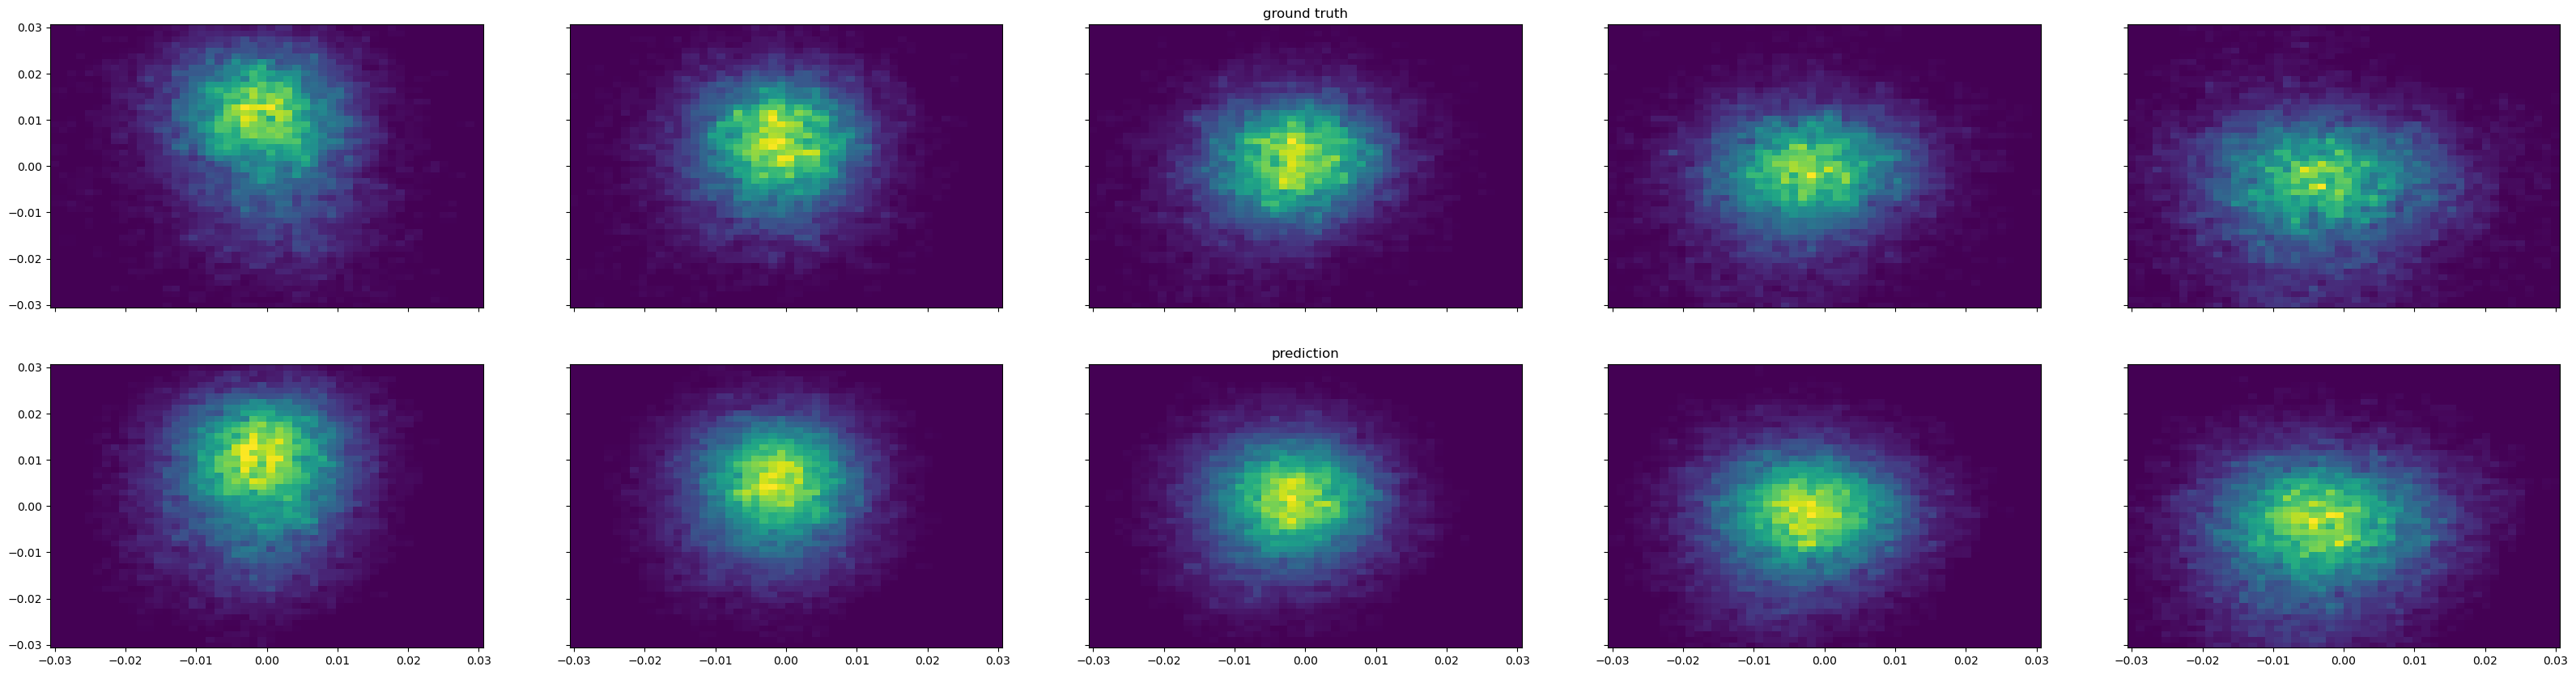

In [11]:
train_single_model()